**Step 1: Load the Data**

The first step is to load the dataset and explore its structure to understand the data types and check for missing values, duplicates, or incorrect entries.

In [8]:
import pandas as pd

# Step 1: Load the dataset
df = pd.read_csv('/content/sample_data/epi_r.csv')  # Adjust filename if needed

# Preview the data
print(df.head())


                                         title  rating  calories  protein  \
0              Lentil, Apple, and Turkey Wrap    2.500     426.0     30.0   
1  Boudin Blanc Terrine with Red Onion Confit    4.375     403.0     18.0   
2                Potato and Fennel Soup Hodge    3.750     165.0      6.0   
3             Mahi-Mahi in Tomato Olive Sauce    5.000       NaN      NaN   
4                    Spinach Noodle Casserole    3.125     547.0     20.0   

    fat  sodium  #cakeweek  #wasteless  22-minute meals  3-ingredient recipes  \
0   7.0   559.0        0.0         0.0              0.0                   0.0   
1  23.0  1439.0        0.0         0.0              0.0                   0.0   
2   7.0   165.0        0.0         0.0              0.0                   0.0   
3   NaN     NaN        0.0         0.0              0.0                   0.0   
4  32.0   452.0        0.0         0.0              0.0                   0.0   

   ...  yellow squash  yogurt  yonkers  yuca  zucc

In [9]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6849 entries, 0 to 6848
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 35.5+ MB
None


**Step 2: Identify Missing, Duplicate, or Incorrect Data**

Check for missing values, duplicates, and incorrect data. We will identify which columns have missing data, how significant it is, and check for any obvious incorrect entries.

In [10]:
# Step 2a: Check for missing values
missing_data = df.isnull().sum()
print("Missing Data Count:")
print(missing_data[missing_data > 0])  # Show only columns with missing data

Missing Data Count:
calories                 1383
protein                  1395
fat                      1402
sodium                   1384
advance prep required       1
                         ... 
cookbooks                   1
leftovers                   1
snack                       1
snack week                  1
turkey                      1
Length: 673, dtype: int64


In [11]:
# Step 2b: Check for duplicate entries
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 232


In [12]:
# Step 2c: Check for incorrect or inconsistent data types (e.g., text in numeric columns)
print(df.describe(include='all'))  # Summary of data to spot any irregularities

                title       rating      calories        protein           fat  \
count            6849  6849.000000  5.466000e+03    5454.000000  5.447000e+03   
unique           6499          NaN           NaN            NaN           NaN   
top     Pastry Dough           NaN           NaN            NaN           NaN   
freq               10          NaN           NaN            NaN           NaN   
mean              NaN     3.730289  8.178513e+03     142.483132  4.260064e+02   
std               NaN     1.322016  4.166014e+05    4826.533700  2.358945e+04   
min               NaN     0.000000  0.000000e+00       0.000000  0.000000e+00   
25%               NaN     3.750000  1.930000e+02       3.000000  7.000000e+00   
50%               NaN     4.375000  3.240000e+02       8.000000  1.700000e+01   
75%               NaN     4.375000  5.830000e+02      26.000000  3.300000e+01   
max               NaN     5.000000  2.999792e+07  236489.000000  1.716279e+06   

              sodium    #ca

**Step 3: Handle Missing Data**

Handling missing data involves deciding whether to drop or fill missing values based on the importance of the column and the proportion of missing data.

For columns with too many missing values, consider dropping them.
For essential columns, use imputation strategies like filling with mean/median (for numerical values) or mode/frequent values (for categorical data).

In [13]:
# Step 3a: Drop columns with too many missing values (if any)
threshold = 0.5  # Drop columns with more than 50% missing values
df_cleaned = df.dropna(thresh=len(df) * threshold, axis=1)

In [15]:
# Step 3b: Fill missing values for numerical columns with the median
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns
df_cleaned[numeric_cols] = df_cleaned[numeric_cols].fillna(df_cleaned[numeric_cols].median())


In [16]:
# Step 3c: Fill missing values for categorical columns with the mode
for col in df_cleaned.select_dtypes(include=['object']).columns:
    # Instead of using inplace=True, assign back to the column
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])

print("Missing Data After Cleaning:")
print(df_cleaned.isnull().sum())


Missing Data After Cleaning:
title         0
rating        0
calories      0
protein       0
fat           0
             ..
cookbooks     0
leftovers     0
snack         0
snack week    0
turkey        0
Length: 680, dtype: int64


In [17]:
print("Missing Data After Cleaning:")
print(df_cleaned.isnull().sum())

Missing Data After Cleaning:
title         0
rating        0
calories      0
protein       0
fat           0
             ..
cookbooks     0
leftovers     0
snack         0
snack week    0
turkey        0
Length: 680, dtype: int64


**Step 4: Handle Duplicates**

Remove duplicate rows if they exist.

In [18]:
# Step 4: Drop duplicate rows
df_cleaned.drop_duplicates(inplace=True)
print(f"Number of rows after removing duplicates: {len(df_cleaned)}")


Number of rows after removing duplicates: 6617


**Step 5: Handle Outliers**

Outliers can be detected and handled for numerical columns using the IQR (Interquartile Range) method.

In [19]:
# Step 5: Identify and handle outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Assuming 'rating' is the column of interest for outlier detection
if 'rating' in df_cleaned.columns:
    df_cleaned = remove_outliers(df_cleaned, 'rating')

print(f"Number of rows after removing outliers: {len(df_cleaned)}")


Number of rows after removing outliers: 5779


**Step 6: Ensure Data Consistency**

Standardize text columns and handle inconsistent values (e.g., ensuring all text is lowercase, removing extra spaces).

In [20]:
# Check column names to find the exact name
print(df_cleaned.columns)

# If there's any extra whitespace, remove it
df_cleaned.columns = df_cleaned.columns.str.strip()

# Now check again if 'ingredients' exists
print(df_cleaned.columns)

# If 'ingredients' exists, apply the transformation:
if 'ingredients' in df_cleaned.columns:
    df_cleaned['ingredients'] = df_cleaned['ingredients'].str.lower().str.strip()
else:
    print("'ingredients' column not found!")


Index(['title', 'rating', 'calories', 'protein', 'fat', 'sodium', '#cakeweek',
       '#wasteless', '22-minute meals', '3-ingredient recipes',
       ...
       'yellow squash', 'yogurt', 'yonkers', 'yuca', 'zucchini', 'cookbooks',
       'leftovers', 'snack', 'snack week', 'turkey'],
      dtype='object', length=680)
Index(['title', 'rating', 'calories', 'protein', 'fat', 'sodium', '#cakeweek',
       '#wasteless', '22-minute meals', '3-ingredient recipes',
       ...
       'yellow squash', 'yogurt', 'yonkers', 'yuca', 'zucchini', 'cookbooks',
       'leftovers', 'snack', 'snack week', 'turkey'],
      dtype='object', length=680)
'ingredients' column not found!


**Save Cleaned Data**

Finally, save the cleaned dataset to a CSV file for further analysis.

In [21]:
# Step 8: Save cleaned data to CSV
df_cleaned.to_csv('epi_recipes_cleaned.csv', index=False)


**Step-by-Step Process for EDA**

**1. Load the Dataset:**

Start by loading the cleaned dataset and understanding the basic structure.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Load dataset
df = pd.read_csv('/content/epi_recipes_cleaned.csv')

# Basic information about the data
print(df.info())

# Descriptive statistics of numerical columns
print(df.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5779 entries, 0 to 5778
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 30.0+ MB
None
            rating      calories        protein           fat        sodium  \
count  5779.000000  5.779000e+03    5779.000000  5.779000e+03  5.779000e+03   
mean      4.176869  7.742693e+03     133.893926  4.020142e+02  7.846705e+03   
std       0.520622  4.051645e+05    4688.929649  2.290191e+04  3.809335e+05   
min       3.125000  0.000000e+00       0.000000  0.000000e+00  0.000000e+00   
25%       3.750000  2.360000e+02       4.000000  1.100000e+01  1.340000e+02   
50%       4.375000  3.240000e+02       8.000000  1.700000e+01  2.810000e+02   
75%       4.375000  5.230000e+02      21.000000  2.900000e+01  5.930000e+02   
max       5.000000  2.999792e+07  236489.000000  1.716279e+06  2.757100e+07   

         #cakeweek  #wasteless  22-minute meals  3-ingredient recipes  \
count  5779.000000      5779.0      5779.00

In [23]:
print(df.columns)


Index(['title', 'rating', 'calories', 'protein', 'fat', 'sodium', '#cakeweek',
       '#wasteless', '22-minute meals', '3-ingredient recipes',
       ...
       'yellow squash', 'yogurt', 'yonkers', 'yuca', 'zucchini', 'cookbooks',
       'leftovers', 'snack', 'snack week', 'turkey'],
      dtype='object', length=680)


**Step 2: Data Cleaning**

**Handle Missing Values**

Check for missing values and decide how to handle them.

In [24]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Fill missing values or drop rows/columns as necessary
df['rating'].fillna(df['rating'].mean(), inplace=True)  # Example for 'rating'
# If there are columns with high missing values, consider dropping them
# df.drop(columns=['column_name'], inplace=True)


Series([], dtype: int64)


**Remove Duplicates**

Check for and remove duplicate entries.

In [25]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates
df.drop_duplicates(inplace=True)


Number of duplicate rows: 0


**Step 3: Exploratory Analysis**

**Univariate Analysis**

Examine the distribution of ratings and other numerical features.

In [26]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


# Set the style for seaborn
sns.set(style="whitegrid")


**Distribution of ratings**

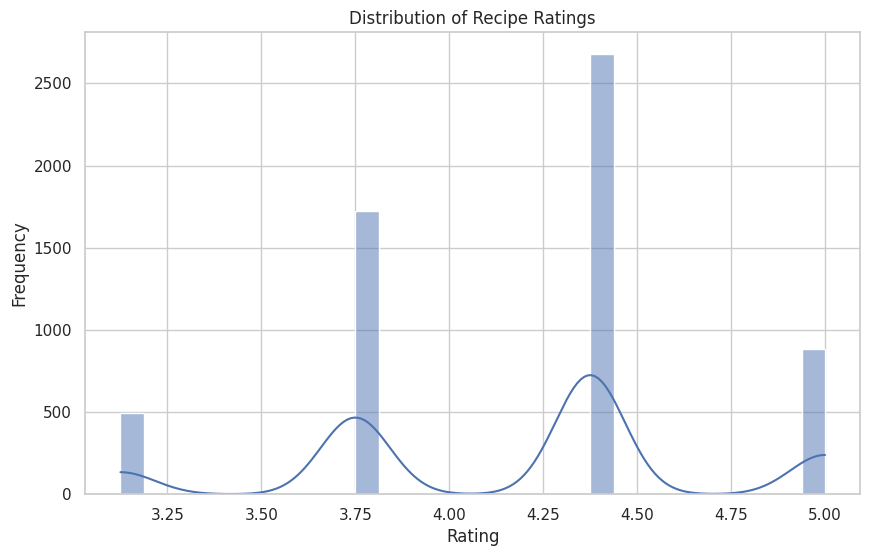

In [27]:

plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=30, kde=True)
plt.title('Distribution of Recipe Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


**Box plot for calories**

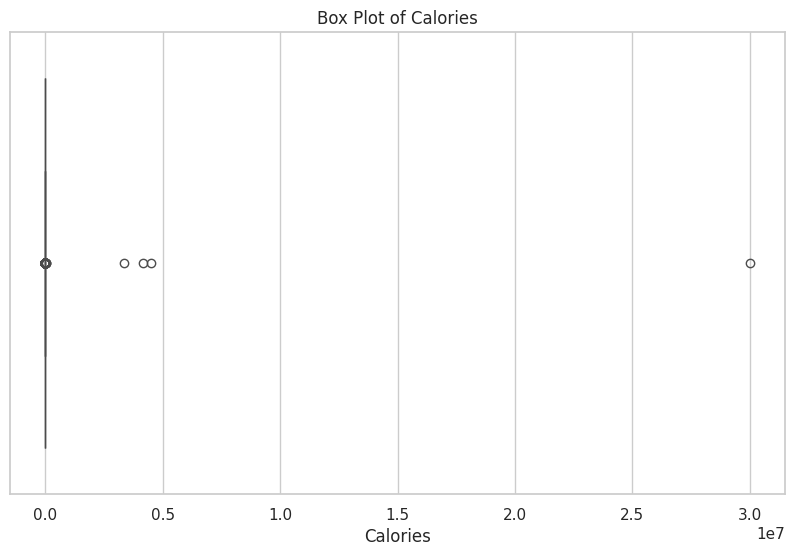

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['calories'])
plt.title('Box Plot of Calories')
plt.xlabel('Calories')
plt.show()

**Bivariate Analysis**

Explore relationships between two variables, such as calories and rating.

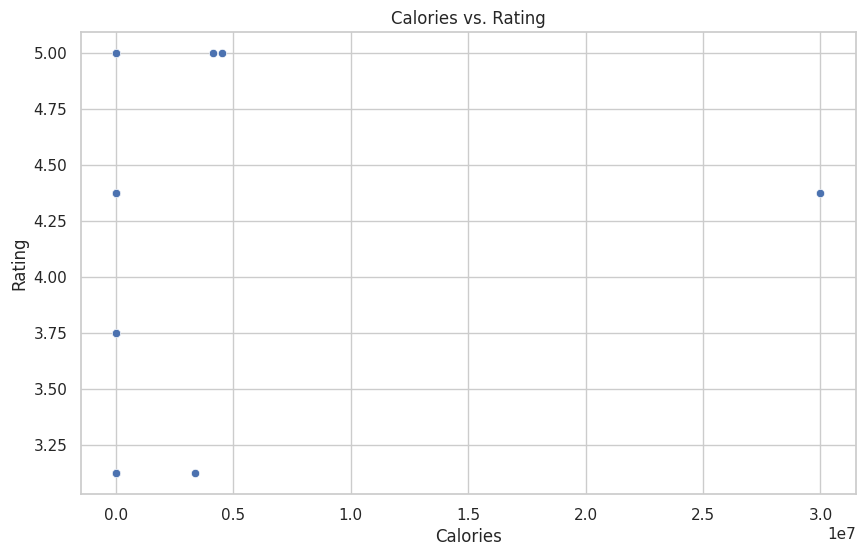

In [29]:
# Scatter plot between calories and rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='calories', y='rating', data=df)
plt.title('Calories vs. Rating')
plt.xlabel('Calories')
plt.ylabel('Rating')
plt.show()

**Visualizing the Data:**
Visualization helps to gain deeper insights into trends, distributions, and relationships within the data. Here are three different types of visualizations.

**a. Distribution of Recipe Ratings (Bar Chart):**
This shows how ratings are distributed across recipes.

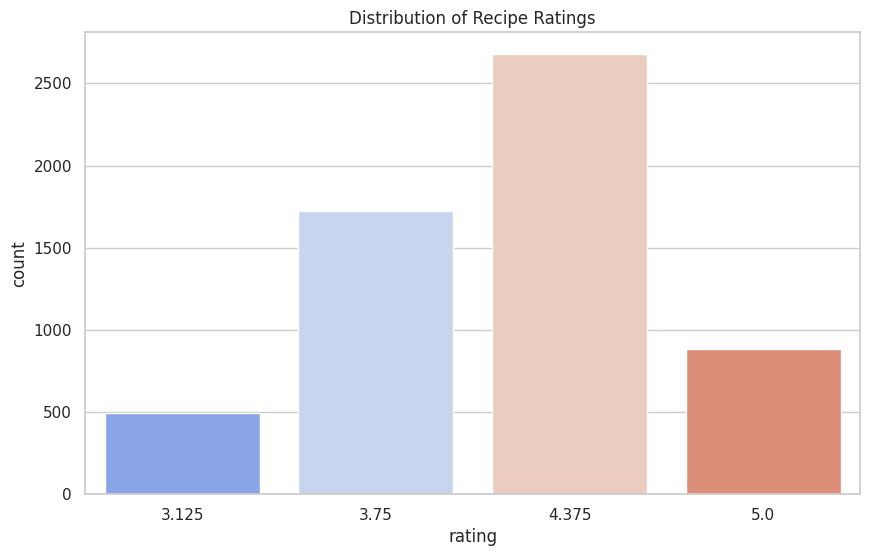

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df_cleaned, palette='coolwarm')
plt.title('Distribution of Recipe Ratings')
plt.show()


**b. Calories vs Protein (Scatter Plot):**

This helps visualize if there's a relationship between the calorie content and the protein content in recipes.

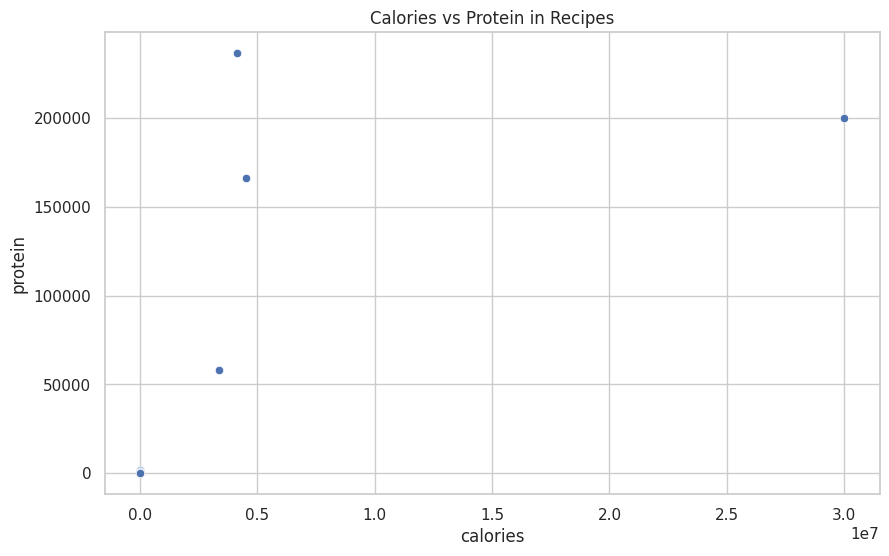

In [32]:
# Scatter plot to visualize Calories vs Protein
plt.figure(figsize=(10, 6))
sns.scatterplot(x='calories', y='protein', data=df_cleaned)
plt.title('Calories vs Protein in Recipes')
plt.show()


**Sodium Content (Histogram):**

A histogram can show the frequency distribution of sodium content.

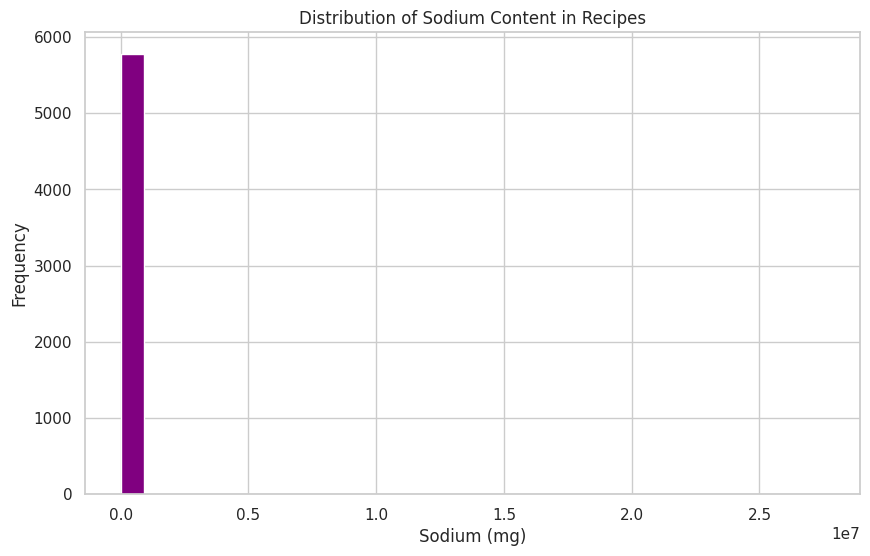

In [33]:
# Histogram to visualize Sodium distribution
plt.figure(figsize=(10, 6))
df_cleaned['sodium'].plot(kind='hist', bins=30, color='purple')
plt.title('Distribution of Sodium Content in Recipes')
plt.xlabel('Sodium (mg)')
plt.show()


**Correlation Heatmap:**

A correlation matrix shows relationships between numerical variables. Higher correlation values (closer to 1 or -1) indicate stronger relationships.

**1. Trends and Outliers:**

Rating Distribution: You can visualize how ratings are distributed to see if most recipes are rated highly or poorly.



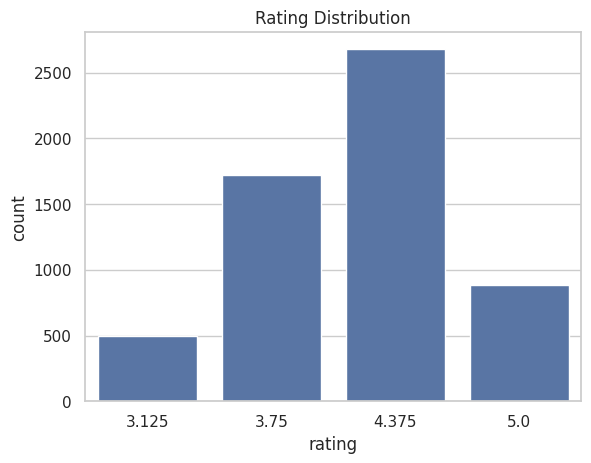

In [35]:
sns.countplot(x='rating', data=df_cleaned)
plt.title('Rating Distribution')
plt.show()


**Outliers:**
 Identify outliers in nutritional values such as calories, protein, and sodium. You can plot boxplots for each variable to detect outliers.

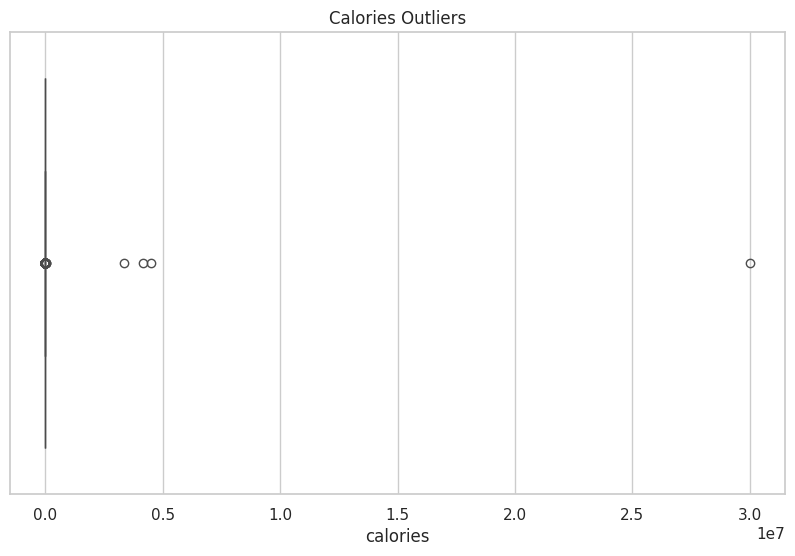

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['calories'])
plt.title('Calories Outliers')
plt.show()


**2. Key Insights:**

Insight 1: Most Common Ingredients in Highly Rated Recipes
Objective: Identify which ingredients are common in highly rated recipes (rating >= 4.5).

In [37]:
high_rated_df = df_cleaned[df_cleaned['rating'] >= 4.5]
ingredient_columns = ['zucchini', 'yogurt', 'turkey', 'leftovers']  # Example columns
ingredient_counts = high_rated_df[ingredient_columns].sum().sort_values(ascending=False)
print("Most Common Ingredients:\n", ingredient_counts)


Most Common Ingredients:
 turkey       27.0
yogurt       19.0
zucchini      6.0
leftovers     0.0
dtype: float64


**Insight 2: Correlation Between Preparation Time and Recipe Rating**

Objective: See if longer preparation times correlate with higher or lower ratings.

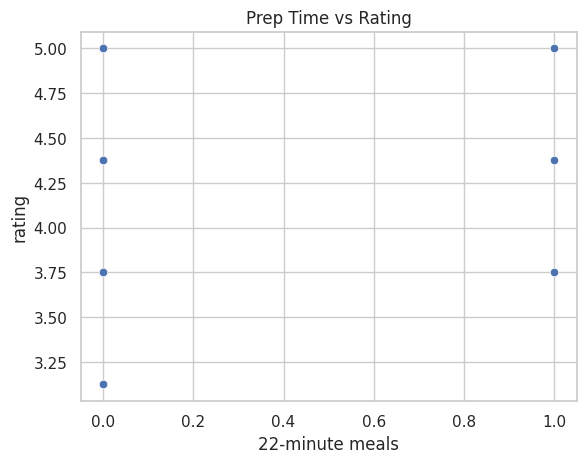

In [43]:
# Assuming there's a column for preparation time 'prep_time'
sns.scatterplot(x='22-minute meals', y='rating', data=df_cleaned)
plt.title('Prep Time vs Rating')
plt.show()


**Insight 3: Health-Oriented Analysis (Calories, Sodium)**

Objective: Provide insights into which recipes are healthier (low sodium and calories).

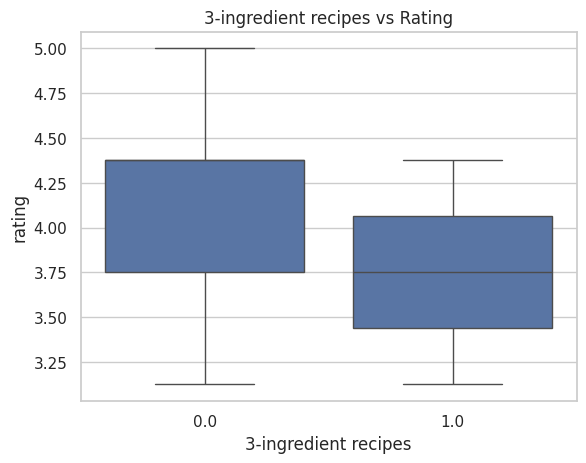

In [45]:
sns.boxplot(x='3-ingredient recipes', y='rating', data=df_cleaned)
plt.title('3-ingredient recipes vs Rating')
plt.show()


**You can look for unique insights, such as ingredient combinations or more advanced correlations.**

**Ingredient Pairing Heatmap:**

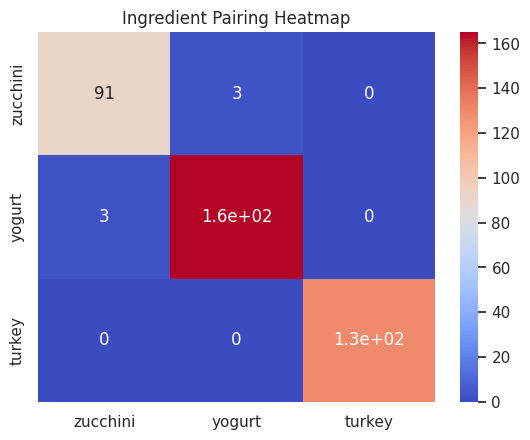

In [40]:
# Ingredient Pairing Heatmap
ingredients = df_cleaned[['zucchini', 'yogurt', 'turkey']]  # Example ingredients
ingredient_combinations = ingredients.T.dot(ingredients)
sns.heatmap(ingredient_combinations, cmap='coolwarm', annot=True)
plt.title('Ingredient Pairing Heatmap')
plt.show()


**Ingredient Combinations:** Explore whether certain combinations of ingredients (e.g., recipes with both turkey and zucchini) are more highly rated than others.

**Recipe Categories:** Investigate recipe categories like 3-ingredient recipes, 22-minute meals, or #cakeweek to see which are most popular in terms of ratings and calories. For example:

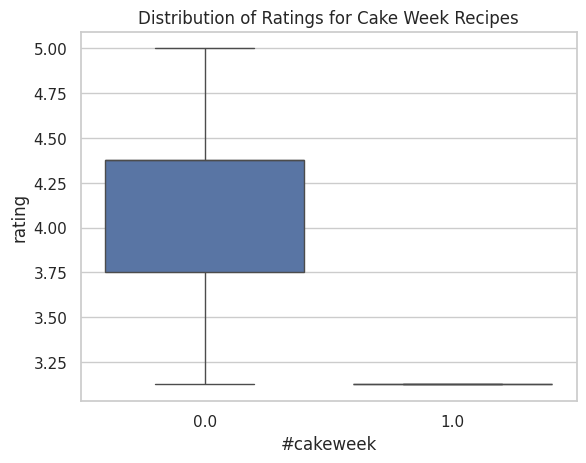

In [41]:
sns.boxplot(x='#cakeweek', y='rating', data=df_cleaned)
plt.title('Distribution of Ratings for Cake Week Recipes')
plt.show()
